In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
pd.options.mode.chained_assignment = None 
pd.set_option('display.max_columns', None)


# Stock Price Prediction 

Giới thiệu Project: ###


## Dataset

Giá chứng khoán Massan 

In [352]:
data = pd.read_csv('../dataset/excel_msn.csv')

In [353]:
data.tail()

,<Ticker>,<DTYYYYMMDD>,<OpenFixed>,<HighFixed>,<LowFixed>,<CloseFixed>,<Volume>,<Open>,<High>,<Low>,<Close>,<VolumeDeal>,<VolumeFB>,<VolumeFS>
2771,MSN,20091111,24.9526,25.7697,24.5126,25.1412,416210,39.7,41.0,39.0,40.0,0,2500,0
2772,MSN,20091110,25.7697,25.8325,25.7697,25.7697,241150,41.0,41.1,41.0,41.0,0,5000,0
2773,MSN,20091109,27.6553,28.4095,27.0896,27.0896,379190,44.0,45.2,43.1,43.1,0,113800,0
2774,MSN,20091106,28.4724,28.4724,27.6553,28.4724,1420500,45.3,45.3,44.0,45.3,0,4600,0
2775,MSN,20091105,27.1525,27.1525,27.1525,27.1525,46500,43.2,43.2,43.2,43.2,0,0,0


In [354]:
data.head()

,<Ticker>,<DTYYYYMMDD>,<OpenFixed>,<HighFixed>,<LowFixed>,<CloseFixed>,<Volume>,<Open>,<High>,<Low>,<Close>,<VolumeDeal>,<VolumeFB>,<VolumeFS>
0,MSN,20201218,84.1000,84.3000,83.7000,84.100,1417470,84.1,84.3,83.7,84.1,183950,265270,37850
1,MSN,20201217,83.5000,84.3000,82.8000,84.000,1179730,83.5,84.3,82.8,84.0,0,265270,37850
2,MSN,20201216,83.0039,83.5968,82.9051,83.498,648540,84.0,84.6,83.9,84.5,0,120670,81540
3,MSN,20201215,83.4980,83.7944,82.9051,83.498,935010,84.5,84.8,83.9,84.5,185200,136130,369570
4,MSN,20201214,83.6956,84.0909,82.9051,83.498,1079350,84.7,85.1,83.9,84.5,1772000,487490,413690


In [355]:
data.shape

(2776, 14)

- Giá tham chiếu: giá Close ngày hôm trước
- Giá Open: giá chốt lệnh lần đầu tiên trong ngày
- Giá High: giá khớp lệnh cao nhất trong ngày
- Giá Low: giá khớp lệnh thấp nhất trong ngày

In [356]:
columns = [i.replace('<', '').replace('>', '') for i in data.columns]

In [357]:
data = data.rename(columns = {data.columns[i]: columns[i] for i in range(len(data.columns))})

In [358]:
data.index = pd.to_datetime(data['DTYYYYMMDD'], format='%Y%m%d')
data.drop(columns=['DTYYYYMMDD', 'Ticker'], inplace=True)


In [359]:
data = data[['Open', 'High', 'Low', 'Close', 'Volume']]

Use 2019-2020 range

In [360]:
df = data[data.index.year.isin([2019, 2020])]

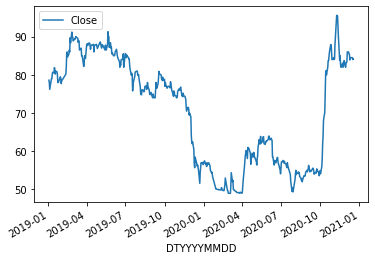

In [361]:
df[['Close']].plot()

Datetime processing

In [362]:
df = df.sort_index()
df.head()

,Open,High,Low,Close,Volume
DTYYYYMMDD,,,,,
2019-01-02,78.9,78.9,78.2,78.6,433670
2019-01-03,78.9,78.9,77.6,78.0,565640
2019-01-04,77.0,77.5,75.5,76.2,463070
2019-01-07,78.1,78.5,77.2,78.2,336380
2019-01-08,78.2,79.1,78.1,79.0,279810


In [363]:
df['date'] = df.index
# df['hour'] = df['date'].dt.hour
df['dayofweek'] = df['date'].dt.dayofweek
df['quarter'] = df['date'].dt.quarter
df['month'] = df['date'].dt.month
df['year'] = df['date'].dt.year
df['dayofyear'] = df['date'].dt.dayofyear
df['dayofmonth'] = df['date'].dt.day
df['weekofyear'] = df['date'].dt.weekofyear
df.drop(columns=['date'], inplace=True)

Moving average

In [364]:
ma_day = [10, 20, 50]

for ma in ma_day:
    column_name = f"MA for {ma} days"
    df[column_name] = df['Close'].rolling(ma).mean()


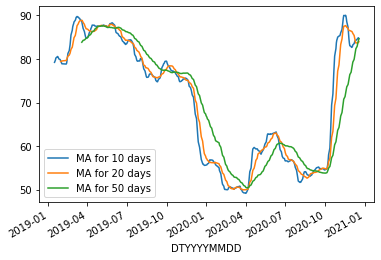

In [365]:
df[['MA for 10 days', 'MA for 20 days', 'MA for 50 days']].plot()

Shifting values

In [366]:
cols = ['Open', 'High', 'Low', 'Close', 'Volume']

In [367]:
for col in cols:
    for i in range(1, 8):
        df[f'{col}_{i}'] = df[col].shift(i)

In [368]:
df.head(10)

,Open,High,Low,Close,Volume,dayofweek,quarter,month,year,dayofyear,dayofmonth,weekofyear,MA for 10 days,MA for 20 days,MA for 50 days,Open_1,Open_2,Open_3,Open_4,Open_5,Open_6,Open_7,High_1,High_2,High_3,High_4,High_5,High_6,High_7,Low_1,Low_2,Low_3,Low_4,Low_5,Low_6,Low_7,Close_1,Close_2,Close_3,Close_4,Close_5,Close_6,Close_7,Volume_1,Volume_2,Volume_3,Volume_4,Volume_5,Volume_6,Volume_7
DTYYYYMMDD,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2019-01-02,78.9,78.9,78.2,78.6,433670,2,1,1,2019,2,2,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2019-01-03,78.9,78.9,77.6,78.0,565640,3,1,1,2019,3,3,1,NaN,NaN,NaN,78.9,NaN,NaN,NaN,NaN,NaN,NaN,78.9,NaN,NaN,NaN,NaN,NaN,NaN,78.2,NaN,NaN,NaN,NaN,NaN,NaN,78.6,NaN,NaN,NaN,NaN,NaN,NaN,433670.0,NaN,NaN,NaN,NaN,NaN,NaN
2019-01-04,77.0,77.5,75.5,76.2,463070,4,1,1,2019,4,4,1,NaN,NaN,NaN,78.9,78.9,NaN,NaN,NaN,NaN,NaN,78.9,78.9,NaN,NaN,NaN,NaN,NaN,77.6,78.2,NaN,NaN,NaN,NaN,NaN,78.0,78.6,NaN,NaN,NaN,NaN,NaN,565640.0,433670.0,NaN,NaN,NaN,NaN,NaN
2019-01-07,78.1,78.5,77.2,78.2,336380,0,1,1,2019,7,7,2,NaN,NaN,NaN,77.0,78.9,78.9,NaN,NaN,NaN,NaN,77.5,78.9,78.9,NaN,NaN,NaN,NaN,75.5,77.6,78.2,NaN,NaN,NaN,NaN,76.2,78.0,78.6,NaN,NaN,NaN,NaN,463070.0,565640.0,433670.0,NaN,NaN,NaN,NaN
2019-01-08,78.2,79.1,78.1,79.0,279810,1,1,1,2019,8,8,2,NaN,NaN,NaN,78.1,77.0,78.9,78.9,NaN,NaN,NaN,78.5,77.5,78.9,78.9,NaN,NaN,NaN,77.2,75.5,77.6,78.2,NaN,NaN,NaN,78.2,76.2,78.0,78.6,NaN,NaN,NaN,336380.0,463070.0,565640.0,433670.0,NaN,NaN,NaN
2019-01-09,79.0,79.8,78.9,79.0,339530,2,1,1,2019,9,9,2,NaN,NaN,NaN,78.2,78.1,77.0,78.9,78.9,NaN,NaN,79.1,78.5,77.5,78.9,78.9,NaN,NaN,78.1,77.2,75.5,77.6,78.2,NaN,NaN,79.0,78.2,76.2,78.0,78.6,NaN,NaN,279810.0,336380.0,463070.0,565640.0,433670.0,NaN,NaN
2019-01-10,79.0,81.1,79.0,80.2,450900,3,1,1,2019,10,10,2,NaN,NaN,NaN,79.0,78.2,78.1,77.0,78.9,78.9,NaN,79.8,79.1,78.5,77.5,78.9,78.9,NaN,78.9,78.1,77.2,75.5,77.6,78.2,NaN,79.0,79.0,78.2,76.2,78.0,78.6,NaN,339530.0,279810.0,336380.0,463070.0,565640.0,433670.0,NaN
2019-01-11,80.3,81.2,80.0,80.7,452300,4,1,1,2019,11,11,2,NaN,NaN,NaN,79.0,79.0,78.2,78.1,77.0,78.9,78.9,81.1,79.8,79.1,78.5,77.5,78.9,78.9,79.0,78.9,78.1,77.2,75.5,77.6,78.2,80.2,79.0,79.0,78.2,76.2,78.0,78.6,450900.0,339530.0,279810.0,336380.0,463070.0,565640.0,433670.0
2019-01-14,80.7,81.3,80.3,80.5,268810,0,1,1,2019,14,14,3,NaN,NaN,NaN,80.3,79.0,79.0,78.2,78.1,77.0,78.9,81.2,81.1,79.8,79.1,78.5,77.5,78.9,80.0,79.0,78.9,78.1,77.2,75.5,77.6,80.7,80.2,79.0,79.0,78.2,76.2,78.0,452300.0,450900.0,339530.0,279810.0,336380.0,463070.0,565640.0


Set the High_Low limit

`lowerbound = 0.93 * Close_1`

`upperbound = 1.07 * Close_1`

In [369]:
df['lowerbound'] = 0.93 * df['Close_1']
df['upperbound'] = 1.07 * df['Close_1']

In [370]:
df.dropna(how='any', inplace=True)

In [371]:
df.tail()

,Open,High,Low,Close,Volume,dayofweek,quarter,month,year,dayofyear,dayofmonth,weekofyear,MA for 10 days,MA for 20 days,MA for 50 days,Open_1,Open_2,Open_3,Open_4,Open_5,Open_6,Open_7,High_1,High_2,High_3,High_4,High_5,High_6,High_7,Low_1,Low_2,Low_3,Low_4,Low_5,Low_6,Low_7,Close_1,Close_2,Close_3,Close_4,Close_5,Close_6,Close_7,Volume_1,Volume_2,Volume_3,Volume_4,Volume_5,Volume_6,Volume_7,lowerbound,upperbound
DTYYYYMMDD,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2020-12-14,84.7,85.1,83.9,84.5,1079350,0,4,12,2020,349,14,51,84.54,83.705,82.926,83.9,83.9,85.5,86.1,86.5,84.0,83.3,84.6,85.4,85.7,86.4,87.1,87.5,84.0,83.2,83.6,85.0,85.3,85.5,83.5,82.5,84.5,83.9,85.4,85.5,86.0,86.0,83.4,791100.0,1432910.0,840910.0,855880.0,825210.0,1978040.0,542070.0,78.585,90.415
2020-12-15,84.5,84.8,83.9,84.5,935010,1,4,12,2020,350,15,51,84.69,83.680,83.456,84.7,83.9,83.9,85.5,86.1,86.5,84.0,85.1,84.6,85.4,85.7,86.4,87.1,87.5,83.9,83.2,83.6,85.0,85.3,85.5,83.5,84.5,84.5,83.9,85.4,85.5,86.0,86.0,1079350.0,791100.0,1432910.0,840910.0,855880.0,825210.0,1978040.0,78.585,90.415
2020-12-16,84.0,84.6,83.9,84.5,648540,2,4,12,2020,351,16,51,84.82,83.760,83.908,84.5,84.7,83.9,83.9,85.5,86.1,86.5,84.8,85.1,84.6,85.4,85.7,86.4,87.1,83.9,83.9,83.2,83.6,85.0,85.3,85.5,84.5,84.5,84.5,83.9,85.4,85.5,86.0,935010.0,1079350.0,791100.0,1432910.0,840910.0,855880.0,825210.0,78.585,90.415
2020-12-17,83.5,84.3,82.8,84.0,1179730,3,4,12,2020,352,17,51,84.88,83.860,84.310,84.0,84.5,84.7,83.9,83.9,85.5,86.1,84.6,84.8,85.1,84.6,85.4,85.7,86.4,83.9,83.9,83.9,83.2,83.6,85.0,85.3,84.5,84.5,84.5,84.5,83.9,85.4,85.5,648540.0,935010.0,1079350.0,791100.0,1432910.0,840910.0,855880.0,78.585,90.415
2020-12-18,84.1,84.3,83.7,84.1,1417470,4,4,12,2020,353,18,51,84.69,83.965,84.630,83.5,84.0,84.5,84.7,83.9,83.9,85.5,84.3,84.6,84.8,85.1,84.6,85.4,85.7,82.8,83.9,83.9,83.9,83.2,83.6,85.0,84.0,84.5,84.5,84.5,84.5,83.9,85.4,1179730.0,648540.0,935010.0,1079350.0,791100.0,1432910.0,840910.0,78.120,89.880


Train test split

In [372]:
cols = [i for i in df.columns if i not in ['Open', 'High', 'Low', 'Volume']]
print(cols)

['Close', 'dayofweek', 'quarter', 'month', 'year', 'dayofyear', 'dayofmonth', 'weekofyear', 'MA for 10 days', 'MA for 20 days', 'MA for 50 days', 'Open_1', 'Open_2', 'Open_3', 'Open_4', 'Open_5', 'Open_6', 'Open_7', 'High_1', 'High_2', 'High_3', 'High_4', 'High_5', 'High_6', 'High_7', 'Low_1', 'Low_2', 'Low_3', 'Low_4', 'Low_5', 'Low_6', 'Low_7', 'Close_1', 'Close_2', 'Close_3', 'Close_4', 'Close_5', 'Close_6', 'Close_7', 'Volume_1', 'Volume_2', 'Volume_3', 'Volume_4', 'Volume_5', 'Volume_6', 'Volume_7', 'lowerbound', 'upperbound']


In [373]:
df = df[cols]
label_col = 'Close'

In [374]:
from sklearn.model_selection import train_test_split

In [375]:
def get_data_splits(df, train_ratio: float, validation_ratio: float, test_ratio: float):
    train_len = int(df.shape[0] * train_ratio)
    train_data = df.iloc[: train_len]
    test_len = int(df.shape[0] * test_ratio)
    test_data = df.iloc[-test_len:]
    val_data = df.iloc[train_len:-test_len]
    return train_data, val_data, test_data

In [376]:
train_data, _, test_data = get_data_splits(df, train_ratio=0.5, validation_ratio=0, test_ratio=0.5)


In [377]:
train_data

,Close,dayofweek,quarter,month,year,dayofyear,dayofmonth,weekofyear,MA for 10 days,MA for 20 days,MA for 50 days,Open_1,Open_2,Open_3,Open_4,Open_5,Open_6,Open_7,High_1,High_2,High_3,High_4,High_5,High_6,High_7,Low_1,Low_2,Low_3,Low_4,Low_5,Low_6,Low_7,Close_1,Close_2,Close_3,Close_4,Close_5,Close_6,Close_7,Volume_1,Volume_2,Volume_3,Volume_4,Volume_5,Volume_6,Volume_7,lowerbound,upperbound
DTYYYYMMDD,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2019-03-19,87.0,1,1,3,2019,78,19,12,88.58,88.890,83.854,86.5,88.6,89.0,88.5,89.6,88.1,89.1,87.6,89.0,89.3,89.5,90.0,89.7,90.0,84.8,85.3,88.6,88.5,88.1,88.1,88.5,86.8,86.5,88.6,89.0,88.5,89.6,89.8,766250.0,1372560.0,201760.0,1014640.0,653990.0,602350.0,469730.0,80.724,92.876
2019-03-20,85.0,2,1,3,2019,79,20,12,88.08,88.840,83.982,87.3,86.5,88.6,89.0,88.5,89.6,88.1,87.3,87.6,89.0,89.3,89.5,90.0,89.7,86.0,84.8,85.3,88.6,88.5,88.1,88.1,87.0,86.8,86.5,88.6,89.0,88.5,89.6,442460.0,766250.0,1372560.0,201760.0,1014640.0,653990.0,602350.0,80.910,93.090
2019-03-21,85.0,3,1,3,2019,80,21,12,87.58,88.605,84.122,85.2,87.3,86.5,88.6,89.0,88.5,89.6,86.2,87.3,87.6,89.0,89.3,89.5,90.0,84.0,86.0,84.8,85.3,88.6,88.5,88.1,85.0,87.0,86.8,86.5,88.6,89.0,88.5,591560.0,442460.0,766250.0,1372560.0,201760.0,1014640.0,653990.0,79.050,90.950
2019-03-22,84.5,4,1,3,2019,81,22,12,87.05,88.410,84.288,85.1,85.2,87.3,86.5,88.6,89.0,88.5,85.4,86.2,87.3,87.6,89.0,89.3,89.5,84.3,84.0,86.0,84.8,85.3,88.6,88.5,85.0,85.0,87.0,86.8,86.5,88.6,89.0,665060.0,591560.0,442460.0,766250.0,1372560.0,201760.0,1014640.0,79.050,90.950
2019-03-25,82.2,0,1,3,2019,84,25,13,86.31,87.960,84.368,84.9,85.1,85.2,87.3,86.5,88.6,89.0,85.3,85.4,86.2,87.3,87.6,89.0,89.3,84.5,84.3,84.0,86.0,84.8,85.3,88.6,84.5,85.0,85.0,87.0,86.8,86.5,88.6,759190.0,665060.0,591560.0,442460.0,766250.0,1372560.0,201760.0,78.585,90.415
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020-01-31,50.1,4,1,1,2020,31,31,5,54.37,55.580,60.234,53.0,54.2,54.3,55.0,56.1,56.5,57.0,53.0,54.6,54.9,55.1,56.4,56.9,57.0,50.0,53.3,54.1,53.0,55.0,56.2,56.0,50.1,53.4,54.5,54.3,55.0,56.2,56.5,1591110.0,540210.0,369330.0,541490.0,496940.0,290210.0,373290.0,46.593,53.607
2020-02-03,50.0,0,1,2,2020,34,3,6,53.67,55.235,59.744,50.0,53.0,54.2,54.3,55.0,56.1,56.5,51.7,53.0,54.6,54.9,55.1,56.4,56.9,50.0,50.0,53.3,54.1,53.0,55.0,56.2,50.1,50.1,53.4,54.5,54.3,55.0,56.2,791350.0,1591110.0,540210.0,369330.0,541490.0,496940.0,290210.0,46.593,53.607
2020-02-04,50.0,1,1,2,2020,35,4,6,53.01,54.880,59.256,46.7,50.0,53.0,54.2,54.3,55.0,56.1,50.0,51.7,53.0,54.6,54.9,55.1,56.4,46.6,50.0,50.0,53.3,54.1,53.0,55.0,50.0,50.1,50.1,53.4,54.5,54.3,55.0,1290570.0,791350.0,1591110.0,540210.0,369330.0,541490.0,496940.0,46.500,53.500


In [378]:
test_data

,Close,dayofweek,quarter,month,year,dayofyear,dayofmonth,weekofyear,MA for 10 days,MA for 20 days,MA for 50 days,Open_1,Open_2,Open_3,Open_4,Open_5,Open_6,Open_7,High_1,High_2,High_3,High_4,High_5,High_6,High_7,Low_1,Low_2,Low_3,Low_4,Low_5,Low_6,Low_7,Close_1,Close_2,Close_3,Close_4,Close_5,Close_6,Close_7,Volume_1,Volume_2,Volume_3,Volume_4,Volume_5,Volume_6,Volume_7,lowerbound,upperbound
DTYYYYMMDD,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2020-02-07,49.9,4,1,2,2020,38,7,6,51.22,53.820,57.870,49.95,50.50,50.10,46.70,50.00,53.0,54.2,49.95,50.50,51.00,50.00,51.70,53.0,54.6,47.5,49.2,49.5,46.6,50.0,50.0,53.3,49.9,50.0,50.0,50.0,50.1,50.1,53.4,2389970.0,750710.0,744900.0,1290570.0,791350.0,1591110.0,540210.0,46.407,53.393
2020-02-10,49.9,0,1,2,2020,41,10,7,50.78,53.485,57.458,49.80,49.95,50.50,50.10,46.70,50.0,53.0,49.90,49.95,50.50,51.00,50.00,51.7,53.0,48.8,47.5,49.2,49.5,46.6,50.0,50.0,49.9,49.9,50.0,50.0,50.0,50.1,50.1,932290.0,2389970.0,750710.0,744900.0,1290570.0,791350.0,1591110.0,46.407,53.393
2020-02-11,49.9,1,1,2,2020,42,11,7,50.32,53.140,57.026,49.90,49.80,49.95,50.50,50.10,46.7,50.0,49.90,49.90,49.95,50.50,51.00,50.0,51.7,48.8,48.8,47.5,49.2,49.5,46.6,50.0,49.9,49.9,49.9,50.0,50.0,50.0,50.1,600280.0,932290.0,2389970.0,750710.0,744900.0,1290570.0,791350.0,46.407,53.393
2020-02-12,50.5,2,1,2,2020,43,12,7,50.03,52.865,56.606,49.20,49.90,49.80,49.95,50.50,50.1,46.7,51.70,49.90,49.90,49.95,50.50,51.0,50.0,49.2,48.8,48.8,47.5,49.2,49.5,46.6,49.9,49.9,49.9,49.9,50.0,50.0,50.0,2081860.0,600280.0,932290.0,2389970.0,750710.0,744900.0,1290570.0,46.407,53.393
2020-02-13,50.2,3,1,2,2020,44,13,7,50.04,52.525,56.190,50.00,49.20,49.90,49.80,49.95,50.5,50.1,50.70,51.70,49.90,49.90,49.95,50.5,51.0,50.0,49.2,48.8,48.8,47.5,49.2,49.5,50.5,49.9,49.9,49.9,49.9,50.0,50.0,804720.0,2081860.0,600280.0,932290.0,2389970.0,750710.0,744900.0,46.965,54.035
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020-12-14,84.5,0,4,12,2020,349,14,51,84.54,83.705,82.926,83.90,83.90,85.50,86.10,86.50,84.0,83.3,84.60,85.40,85.70,86.40,87.10,87.5,84.0,83.2,83.6,85.0,85.3,85.5,83.5,82.5,84.5,83.9,85.4,85.5,86.0,86.0,83.4,791100.0,1432910.0,840910.0,855880.0,825210.0,1978040.0,542070.0,78.585,90.415
2020-12-15,84.5,1,4,12,2020,350,15,51,84.69,83.680,83.456,84.70,83.90,83.90,85.50,86.10,86.5,84.0,85.10,84.60,85.40,85.70,86.40,87.1,87.5,83.9,83.2,83.6,85.0,85.3,85.5,83.5,84.5,84.5,83.9,85.4,85.5,86.0,86.0,1079350.0,791100.0,1432910.0,840910.0,855880.0,825210.0,1978040.0,78.585,90.415
2020-12-16,84.5,2,4,12,2020,351,16,51,84.82,83.760,83.908,84.50,84.70,83.90,83.90,85.50,86.1,86.5,84.80,85.10,84.60,85.40,85.70,86.4,87.1,83.9,83.9,83.2,83.6,85.0,85.3,85.5,84.5,84.5,84.5,83.9,85.4,85.5,86.0,935010.0,1079350.0,791100.0,1432910.0,840910.0,855880.0,825210.0,78.585,90.415


Min Max scaling

In [379]:
import sklearn.preprocessing
def minmax_scale(df: pd.DataFrame, cont_features: list = None):
    if cont_features is None:
        cont_features = df.columns
    scaler = sklearn.preprocessing.MinMaxScaler()
    df[cont_features] = scaler.fit_transform(df[cont_features].to_numpy())

    return df

In [380]:
train_data = minmax_scale(train_data)
test_data = minmax_scale(test_data)

In [381]:
X_train, y_train = train_data.drop(columns=[label_col]), train_data[label_col]
X_test, y_test = test_data.drop(columns=[label_col]), test_data[label_col]

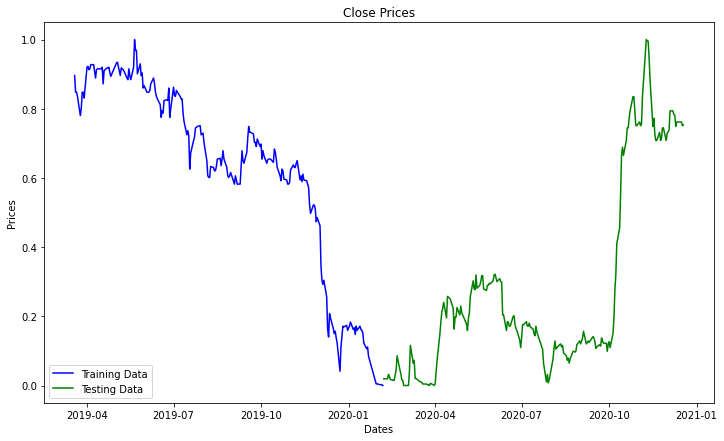

In [382]:
plt.figure(figsize=(12,7))
plt.title('Close Prices')
plt.xlabel('Dates')
plt.ylabel('Prices')
plt.plot(y_train, 'blue', label='Training Data')
plt.plot(y_test, 'green', label='Testing Data')
plt.legend()


### Feature Selection

In [383]:
from sklearn.feature_selection import SelectKBest, f_regression

In [384]:
print(X_train.shape)

(222, 47)


In [385]:
np.sqrt(221)

14.866068747318506

In [386]:
k = 14
select_k_best = SelectKBest(f_regression, k=k)
select_k_best.fit(X_train, y_train)


SelectKBest(k=14, score_func=<function f_regression at 0x00000200CA3161F0>)

In [387]:
X_train_cols = train_data.columns[np.argsort(select_k_best.scores_)[::-1][:k]]
print(X_train_cols)

Index(['lowerbound', 'Low_7', 'Volume_7', 'Open_7', 'High_7', 'Close_1',
       'MA for 50 days', 'High_1', 'Low_1', 'weekofyear', 'Close_2', 'Open_1',
       'High_2', 'Low_2'],
      dtype='object')


In [388]:
X_train = select_k_best.transform(X_train)

In [389]:
X_train = pd.DataFrame(X_train, columns=X_train_cols)

In [390]:
X_test = SelectKBest(f_regression, k=k).fit_transform(X_test, y_test)
X_test.shape


C:\Users\tuantv26\Anaconda3\envs\FundaPython\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:302: RuntimeWarning: invalid value encountered in true_divide
  corr /= X_norms
C:\Users\tuantv26\Anaconda3\envs\FundaPython\lib\site-packages\scipy\stats\_distn_infrastructure.py:1932: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= _a)


(222, 14)

## Baseline

Linear Regression

In [391]:
from sklearn.linear_model import LinearRegression

In [392]:
linear_reg = LinearRegression()
linear_reg.fit(X_train, y_train)

LinearRegression()

Evaluate

In [393]:
from sklearn.metrics import mean_squared_error, r2_score

In [394]:
def MAPE(y_true, y_pred):
    error = np.abs(y_true - y_pred) / y_true
    error.replace([np.inf, -np.inf], np.nan, inplace=True)
    error = error[~np.isnan(error)]

    return np.mean(error) * 100


In [395]:
y_pred = linear_reg.predict(X_test)
y_pred = pd.Series(y_pred, index=y_test.index)
MAPE(y_test, y_pred)

30.882352825093772

In [396]:
mean_squared_error(y_test, y_pred)

0.001106992527363225

In [397]:
r2_score(y_test, y_pred)

0.9856385721928587

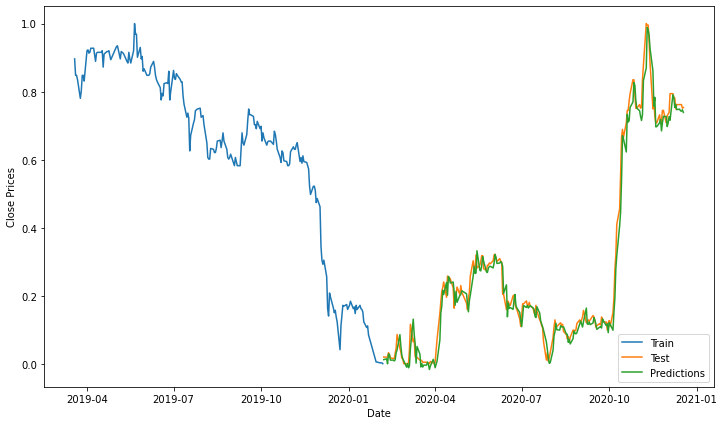

In [398]:
plt.figure(figsize=(12, 7))
plt.xlabel('Date')
plt.ylabel('Close Prices')
plt.plot(y_train)
plt.plot(y_test)
plt.plot(y_pred)
plt.legend(['Train', 'Test', 'Predictions'], loc='lower right')
plt.show()

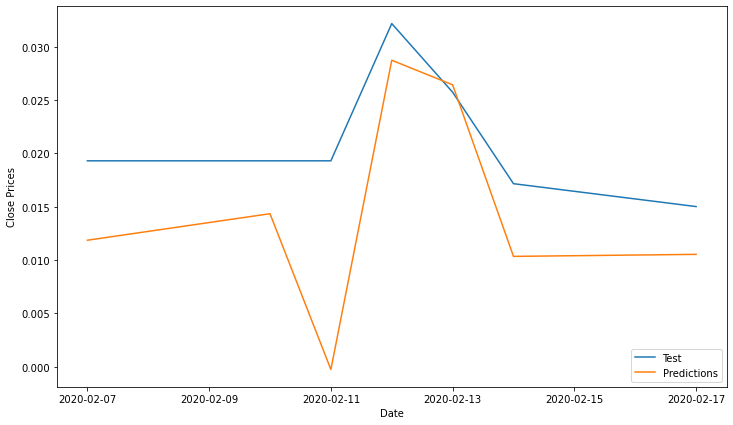

In [399]:
plt.figure(figsize=(12, 7))
plt.xlabel('Date')
plt.ylabel('Close Prices')
plt.plot(y_test[:7])
plt.plot(y_pred[:7])
plt.legend(['Test', 'Predictions'], loc='lower right')
plt.show()

In [351]:
k = 5
top_k_coefs = np.abs(linear_reg.coef_).argsort()[::-1][:k]
print(linear_reg.coef_[top_k_coefs])
X_train.columns[top_k_coefs]

[-0.92552047  0.45863696  0.40254786 -0.32881433  0.32361376]


Index(['weekofyear', 'Low_1', 'Open_7', 'Close_2', 'High_7'], dtype='object')